<a href="https://colab.research.google.com/github/TasnimeAyed/liar_dataset/blob/master/analise_sentimento_ok_bad_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install language detection (english)

In [1]:
!pip install langdetect



     |████████████████████████████████| 983kB 2.8MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=b30db964ef51103433cf31169219e74c8e0a4f939e23e85043746422eea0683e
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


# Import Libraries

In [2]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import sys
# Install spaCy (run in terminal/prompt)
!{sys.executable} -m pip install spacy
# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en
import spacy

import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import string
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from textblob import TextBlob, Word

import re
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
from gensim import corpora
import gensim
from sklearn.metrics import confusion_matrix, f1_score, classification_report
#from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Get the Data

In [0]:
uri_train  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/train.tsv'
uri_valid  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/valid.tsv'
uri_test  = 'https://raw.githubusercontent.com/thiagorainmaker77/liar_dataset/master/test.tsv'

In [4]:
#the train dataset

df_train = pd.read_table(uri_train,
                             names = ['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',	
                                        'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])
df_train.head(2)
df_train.describe()
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10240 non-null  object 
 1   label            10240 non-null  object 
 2   statement        10240 non-null  object 
 3   subject          10238 non-null  object 
 4   speaker          10238 non-null  object 
 5   job              7343 non-null   object 
 6   state            8032 non-null   object 
 7   party            10238 non-null  object 
 8   barely_true_c    10238 non-null  float64
 9   false_c          10238 non-null  float64
 10  half_true_c      10238 non-null  float64
 11  mostly_true_c    10238 non-null  float64
 12  pants_on_fire_c  10238 non-null  float64
 13  venue            10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [5]:
#the valid dataset


df_valid = pd.read_table(uri_valid,
                             names =['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',
                                       'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue'])

df_valid.head(2)
df_valid.describe()
df_valid.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1284 non-null   object
 1   label            1284 non-null   object
 2   statement        1284 non-null   object
 3   subject          1284 non-null   object
 4   speaker          1284 non-null   object
 5   job              939 non-null    object
 6   state            1005 non-null   object
 7   party            1284 non-null   object
 8   barely_true_c    1284 non-null   int64 
 9   false_c          1284 non-null   int64 
 10  half_true_c      1284 non-null   int64 
 11  mostly_true_c    1284 non-null   int64 
 12  pants_on_fire_c  1284 non-null   int64 
 13  venue            1272 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.6+ KB


In [6]:
#the test dataset


df_test = pd.read_csv(uri_test, sep='\t', 
                            names =['id',	'label'	,'statement',	'subject',	'speaker', 	'job', 	'state',	'party',	'barely_true_c',
                                      'false_c',	'half_true_c',	'mostly_true_c',	'pants_on_fire_c',	'venue']) 
df_test.head(2)
df_test.describe()
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1267 non-null   object
 1   label            1267 non-null   object
 2   statement        1267 non-null   object
 3   subject          1267 non-null   object
 4   speaker          1267 non-null   object
 5   job              942 non-null    object
 6   state            1005 non-null   object
 7   party            1267 non-null   object
 8   barely_true_c    1267 non-null   int64 
 9   false_c          1267 non-null   int64 
 10  half_true_c      1267 non-null   int64 
 11  mostly_true_c    1267 non-null   int64 
 12  pants_on_fire_c  1267 non-null   int64 
 13  venue            1250 non-null   object
dtypes: int64(5), object(9)
memory usage: 138.7+ KB


In [7]:
df = pd.concat([df_train, df_valid])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11524 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11524 non-null  object 
 1   label            11524 non-null  object 
 2   statement        11524 non-null  object 
 3   subject          11522 non-null  object 
 4   speaker          11522 non-null  object 
 5   job              8282 non-null   object 
 6   state            9037 non-null   object 
 7   party            11522 non-null  object 
 8   barely_true_c    11522 non-null  float64
 9   false_c          11522 non-null  float64
 10  half_true_c      11522 non-null  float64
 11  mostly_true_c    11522 non-null  float64
 12  pants_on_fire_c  11522 non-null  float64
 13  venue            11410 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.3+ MB


# Features correlations with each other and with the target


In [8]:
liar_list =pd.concat ([df,df_test])
liar_list.head(2)



,id,label,statement,subject,speaker,job,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,venue
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


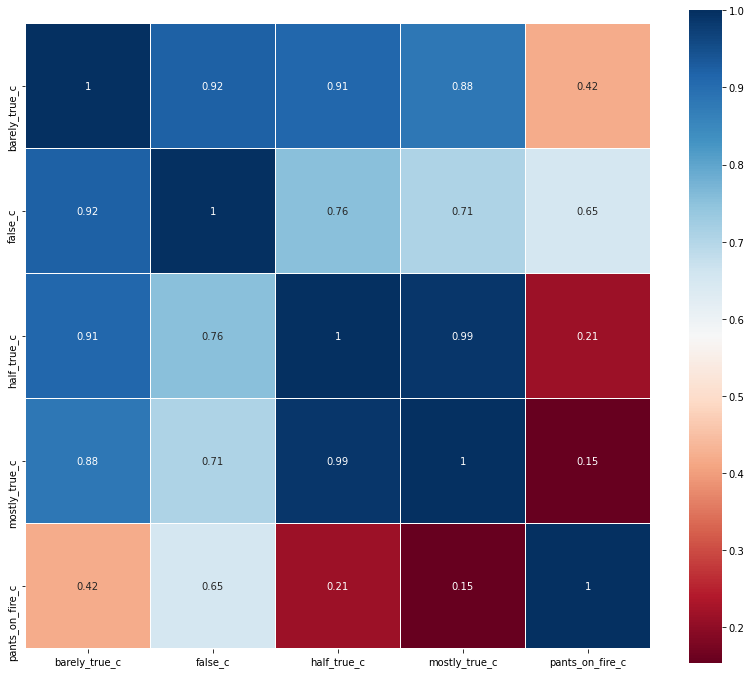

In [9]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

plt.savefig('/content/correlation.png', dpi=None, facecolor='w',
                edgecolor='w',
                orientation='portrait', papertype=None, format=None,
                transparent=False, bbox_inches='tight', pad_inches=0.1,
                frameon=None, metadata=None)

# Data Exploration

In [10]:
from io import StringIO

#add a column 'category_id' encoding the 'label' as an integer because categorical variables are often better represented by integers than strings.
col = ['label','statement']
liar_list = liar_list[col]
liar_list = liar_list[pd.notnull(liar_list['statement'])]
liar_list.columns = ['label', 'statement']
liar_list['category_id'] = liar_list['label'].factorize()[0]
category_id_liar_list = liar_list[['label', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id_liar_list = dict(category_id_liar_list.values)
id_to_category = dict(category_id_liar_list[['category_id', 'label']].values)
liar_list.head()

,label,statement,category_id
0,false,Says the Annies List political group supports ...,0
1,half-true,When did the decline of coal start? It started...,1
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",2
3,false,Health care reform legislation is likely to ma...,0
4,half-true,The economic turnaround started at the end of ...,1


# Imbalanced Classes
When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored. For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

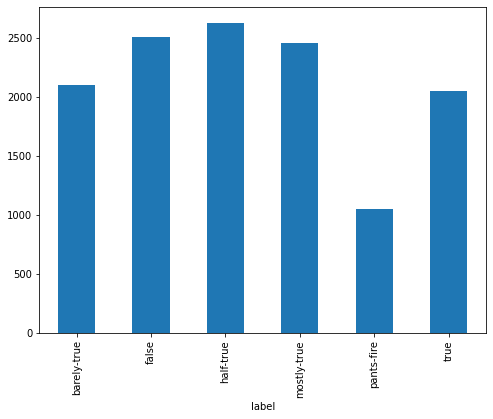

In [11]:
#import matplotlib.pyplot as plt

#We see that the number of statements per label is imbalanced. 
#the statements are more biased towards half_true, mostly_true and false.

fig = plt.figure(figsize=(8,6))
liar_list.groupby('label').statement.count().plot.bar(ylim=0)
plt.show()

# Text Representation
The classifiers and learning algorithms can not directly process the text documents in their original form, as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length. Therefore, during the preprocessing step, the texts are converted to a more manageable representation.
One common approach for extracting features from text is to use the "bag of words" model: a model where for each document, a complaint narrative in our case, the presence (and often the frequency) of words is taken into consideration, but the order in which they occur is ignored.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(liar_list.statement)
labels = liar_list.category_id
features.shape

#Now, each of 12791 statement is represented by 5581 features, 
#representing the tf-idf score for different unigrams and bigrams.

(12791, 5581)

In [13]:
#We can use "sklearn.feature_selection.chi2" to find the terms that are the most correlated with each of the labels

from sklearn.feature_selection import chi2
import numpy as np

N = 2
for label, category_id in sorted(category_to_id_liar_list.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(label))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'barely-true':
  . Most correlated unigrams:
. coffman
. benghazi
  . Most correlated bigrams:
. deciding vote
. unemployment percent
# 'false':
  . Most correlated unigrams:
. scheme
. debunked
  . Most correlated bigrams:
. ponzi scheme
. terry mcauliffe
# 'half-true':
  . Most correlated unigrams:
. ranking
. indiana
  . Most correlated bigrams:
. time state
. americans work
# 'mostly-true':
  . Most correlated unigrams:
. percent
. industrialized
  . Most correlated bigrams:
. cut half
. highest corporate
# 'pants-fire':
  . Most correlated unigrams:
. muslim
. socialists
  . Most correlated bigrams:
. says barack
. voter fraud
# 'true':
  . Most correlated unigrams:
. prisons
. compensation
  . Most correlated bigrams:
. born wedlock
. 96 percent


# Multi-Class Classifier: Features and Design
After all the above data transformation, now that we have all the features and labels, it is time to train the classifiers. There are a number of algorithms we can use for this type of problem.

In [0]:
#Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 0, test_size=0.2)

clf = MultinomialNB().fit(X_train, y_train)
prediction = clf.predict(X_test)

In [15]:
#accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

0.23681125439624853

In [17]:
#manually prediction
liar_list[liar_list['statement'] == 
                        "Says John McCain has done nothing to help the vets."]

,label,statement,category_id
2,false,Says John McCain has done nothing to help the ...,0


# Model Selection
We are now ready to experiment with different machine learning models, evaluate their accuracy and find the source of any potential issues.
We will benchmark the following four models:
1. Logistic Regression
2. (Multinomial) Naive Bayes
3. Linear Support Vector Machine
4. Random Forest


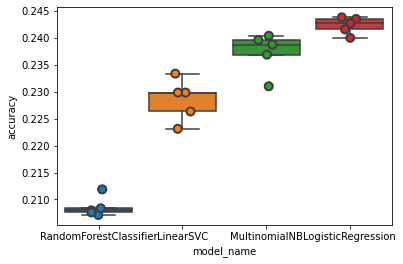

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()


In [20]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.228520
LogisticRegression        0.242358
MultinomialNB             0.237354
RandomForestClassifier    0.208584
Name: accuracy, dtype: float64

# Model Evaluation
Continue with our best model (LogisticRegression), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

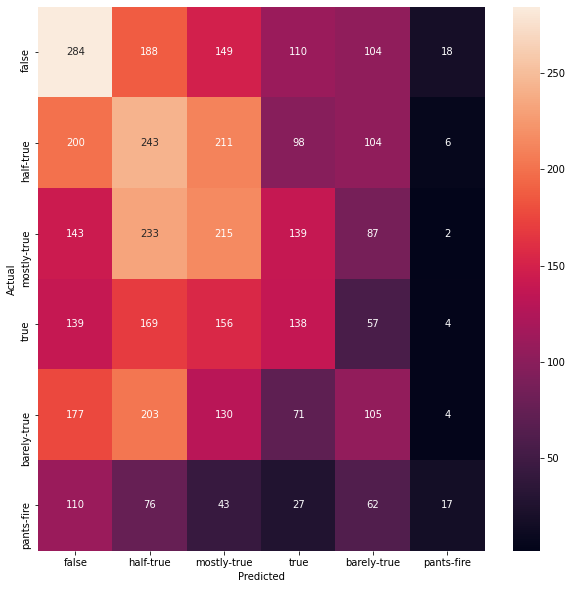

In [23]:
model = LogisticRegression()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, liar_list.index, test_size=0.33, random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_liar_list.label.values, yticklabels=category_id_liar_list.label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**There are a number of misclassifications, and it might be interesting to see what those are caused by:**

In [27]:
from IPython.display import display

for predicted in category_id_liar_list.category_id:
  for actual in category_id_liar_list.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(liar_list.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['label', 'statement']])
      print('')

'half-true' predicted as 'false' : 200 examples.


,label,statement
617,pants-fire,"Wisconsin has only one county, Dane, thats han..."
617,pants-fire,The United States stood alone in the war in Iraq.
617,half-true,The permission to engage was given before the ...
1941,half-true,Says Barack Obamas administration has admitted...
3028,half-true,Just remember this: the presidents health care...
...,...,...
7707,half-true,About half the people who would qualify for Me...
4155,half-true,Undocumented immigrantspay $12 billion a year ...
135,false,SaysMichael Bennet wants to close Guantanamo B...
135,half-true,The NCAA will get billions from the mens baske...



'mostly-true' predicted as 'false' : 143 examples.


,label,statement
4011,mostly-true,"In 2009, the Small Business Entrepreneurship C..."
1969,mostly-true,The IRS has been specifically forbidden ... fr...
6578,mostly-true,Taxes on groceries and medicine will rise unde...
6794,mostly-true,Wisconsin Republicans repealed a statewide fai...
8843,mostly-true,U.S. Senate candidate Jack Kingston requested ...
...,...,...
1791,mostly-true,"By spring 2014, parents of 60,000 students in ..."
2250,mostly-true,Job losses are so certain under this new cap-a...
341,mostly-true,"We are younger than our competitors, and this ..."
341,false,Says Mark Pryor voted to give Social Security ...



'true' predicted as 'false' : 139 examples.


,label,statement
9026,true,Says members of the military have sent him mor...
1063,pants-fire,If you sell your house after 2012 you will pay...
1063,barely-true,Michelle Nunn has praised the Occupy movement.
1063,true,John Raeses wife is registered to vote in Flor...
3752,true,"As a state senator, he (Obama) even refused to..."
...,...,...
179,true,"John McCain ""has not led on nonproliferation i..."
8576,true,"Here in Wisconsin, weve put in previous budget..."
1009,mostly-true,The average taxpayer will see the equivalent o...
1009,true,Says Ron Paul doesnt believe in marriage licen...



'barely-true' predicted as 'false' : 177 examples.


,label,statement
6737,barely-true,Even Richard Nixon released his tax returns to...
570,half-true,Mitt Romneys pledged to protect (oil companies...
570,barely-true,She hasn't run a corner store. She hasn't run ...
570,half-true,Medicare only has about 50 percent of it paid ...
1164,mostly-true,Ohios Planned Parenthood operations received m...
...,...,...
807,barely-true,Says a group estimates that the annual cost to...
807,barely-true,Says that President Obama said if Congress pas...
947,false,Says Sen. John McCain spent the July 4 weekend...
947,barely-true,President Barack Obama attended an Islamic mad...



'pants-fire' predicted as 'false' : 110 examples.


,label,statement
4694,pants-fire,The University of Wisconsin-Milwaukee has 2.8 ...
7475,pants-fire,The IRS is going to be in charge of a huge nat...
967,barely-true,Chris Sununu supported Obamas Common Core agen...
967,pants-fire,Action by the Milwaukee County Board will prov...
967,half-true,"In Hillary Clintons tax returns, you saw a lot..."
...,...,...
564,pants-fire,Obamacare Medical Codes Confirm: Execution by ...
564,mostly-true,Voter turnout for some groups in the 2008 pres...
38,pants-fire,"In the case of a catastrophic event, the Atlan..."
38,barely-true,Charlie Crist attacks me for positions he held...



'false' predicted as 'half-true' : 188 examples.


,label,statement
9413,false,The President wants the U.S. to sign on to the...
6146,false,As long as I have served . . . This is the fir...
5006,false,Jobs that involve the minimum wage are overwhe...
787,mostly-true,In exchange for five minutes with Bill Clinton...
787,half-true,"Says Rep. Tom Reed, R-N.Y., voted to raise the..."
...,...,...
736,mostly-true,Says paid family leave is a program that is st...
736,false,"In the last two years, we have reduced the def..."
736,true,Only 42 percent of young Georgians have a coll...
3753,false,We could cut unemployment in half simply by re...



'mostly-true' predicted as 'half-true' : 233 examples.


,label,statement
8327,mostly-true,Says Hillary Clinton couldnt bring herself to ...
3955,mostly-true,Travis County now has the highest urban county...
10025,mostly-true,Says Donald Trump wants to keep big government...
9295,mostly-true,Says Ronald Reagan understood repeatedly that ...
6031,mostly-true,Says Tommy Thompsons tax plan amounts to an av...
...,...,...
461,barely-true,"House Republicans ""weren't part of the negotia..."
461,mostly-true,Obama-Nelson economic record: Job creation ......
254,false,Twelve judges have thrown out legal challenges...
254,mostly-true,"Says British voters under 50, especially mille..."



'true' predicted as 'half-true' : 169 examples.


,label,statement
1554,true,The State of Texas is funding womens health se...
720,false,"In Ohio, we invested in our children, raising ..."
720,mostly-true,About 85 percent of hotel guests who will pay ...
720,true,"Before I was state treasurer, my Rhode Island ..."
3368,true,He's sued gun manufacturers. He was supportive...
...,...,...
7435,true,We spend more on health care than any other co...
9180,true,Clinton said great things about NAFTA until sh...
901,mostly-true,"According to the most recent report, Wisconsin..."
901,false,Signs letter saying Consumer Product Safety Co...



'barely-true' predicted as 'half-true' : 203 examples.


,label,statement
5938,barely-true,Florida's new fingerprint identification syste...
440,true,Tom Reed has actually voted for every single t...
440,false,There comes a point in the last year of the pr...
440,barely-true,Since the beginning of the year weve created a...
7588,barely-true,After Ronald Reagan cut taxes in 1981 the U.S....
...,...,...
4348,barely-true,"In Texas public schools, we spend an average o..."
9944,barely-true,"Obama is the Senate's ""most liberal."""
1066,barely-true,"Prior to 1962, everybody prayed before school ..."
1066,pants-fire,Says President BarackObama has issued upwards ...



'pants-fire' predicted as 'half-true' : 76 examples.


,label,statement
2064,pants-fire,Inner-city crime is reaching record levels.
3523,pants-fire,There was serious voter fraud in New Hampshire.
6621,pants-fire,Promotes a chart saying that Barack Obama has ...
6288,pants-fire,"Since Rep. John Boccieris election, Ohio has l..."
1233,false,Attorney General Eric Holder is involved in th...
...,...,...
65,barely-true,Says that when Democrats controlled Congress a...
65,false,The tax cut deal is giving $700 billion to mil...
444,pants-fire,The unemployment rate may be as high as 42 per...
444,barely-true,After the 2001 and 2003 Bush tax rate cuts ......



'false' predicted as 'mostly-true' : 149 examples.


,label,statement
7855,false,None of the polls being conducted right now ha...
5964,false,Says iPads and iPhones are built in the United...
667,true,Eight out of the nine states with competitive ...
667,false,"Obama, Biden and their liberal allies oppose c..."
667,false,On whether hes had a relationship with Vladimi...
...,...,...
222,barely-true,Increasing the bottle deposit to 10 cents on a...
222,false,The percentage of black children born without ...
171,half-true,Says Illinois gubernatorial candidate Bill Bra...
171,false,Decriminalizing marijuana will save the state ...



'half-true' predicted as 'mostly-true' : 211 examples.


,label,statement
7660,half-true,There are currently delays of up to six months...
8189,half-true,Says abill he vetoed to give driver licenses t...
1233,false,Attorney General Eric Holder is involved in th...
1233,half-true,New Hampshire is currently the only state in t...
1233,pants-fire,If you look at the application for a security ...
...,...,...
184,half-true,Bill Nelson leased land that he owned for six ...
3594,half-true,"Drilling in ANWR would have minimal impact, co..."
508,half-true,Im the only (Republican)candidate that has act...
508,true,60 percent of all Americans do not want to see...



'true' predicted as 'mostly-true' : 156 examples.


,label,statement
5595,true,Wisconsin is called the Badger State because o...
1151,mostly-true,Says 31 percent of Texas physicians accept all...
1151,false,New Jersey taxpayers will now face the highest...
1151,true,More than half of women under 30 who give birt...
961,mostly-true,When we've got CEOs making more in 10 minutes ...
...,...,...
456,half-true,Says Donald Trump publicly invited Putin to ha...
1247,true,Says Central Texas river water sent to downstr...
1247,pants-fire,"In the health care bill, were now offering ins..."
1247,true,Says Barack Obama promised to halve the defici...



'barely-true' predicted as 'mostly-true' : 130 examples.


,label,statement
7324,barely-true,Oregon has the sixth highest combined death ta...
812,barely-true,"Under New York Mayor Bill de Blasio, homicides..."
812,half-true,Ohio taxpayers spent more than $67 million for...
812,mostly-true,I never gave up custody of my children. I neve...
2278,barely-true,Greg Abbott said it would be a waste to expand...
...,...,...
444,half-true,"While 9,000 state employees were added to the ..."
687,true,Says Oregon is near the top or at the top of t...
687,barely-true,"Because of the current immigration crisis, Rep..."
687,pants-fire,"Says Marco Rubio believes the earth is 9,000 y..."



'pants-fire' predicted as 'mostly-true' : 43 examples.


,label,statement
909,pants-fire,Barack Obama appeared in the video for 'Whoomp...
909,mostly-true,Texas had the worst voter participation in the...
909,pants-fire,The runnerup to Caitlyn Jenner for ESPNs Arthu...
406,pants-fire,I'm probably one of the four or five best-know...
406,mostly-true,Says Texas high school graduation rates are at...
...,...,...
348,barely-true,Medicare is going broke. The trust fund goes b...
348,pants-fire,A bill by Earl Blumenauer would mandate GPS tr...
8277,pants-fire,Austin mayoral candidate Mike Martinez takes c...
2666,pants-fire,Ive been outspent by my opponents every time I...



'false' predicted as 'true' : 110 examples.


,label,statement
713,false,Says the No. 2 cause of death in the U.S. (for...
713,half-true,All but one of the 50 states already have some...
713,barely-true,In the Patient Protection and Affordable Care ...
467,false,John wasn't this raging populist four years ag...
467,half-true,U.S. Sen. Bill Nelson chose to side with Presi...
...,...,...
732,half-true,Says Jon Huntsman supports changes in Medicare...
4624,false,You cant pass a budget in the Senate of the Un...
1920,false,The measles vaccine has killed 108 people in t...
1353,false,Says Wisconsin state Senate President Michael ...



'half-true' predicted as 'true' : 98 examples.


,label,statement
5741,half-true,Ohio is doing better right now than the nation...
7443,half-true,Only four countries in the world allow abortio...
9678,half-true,The governments twice the size it was 10 years...
892,pants-fire,"Photo of ""tea party"" protests shows crowd spra..."
892,half-true,The (Ohio) economy is on the mend. It is in be...
...,...,...
6805,half-true,Says state schools superintendent candidate Do...
1258,mostly-true,One out of every four homeless people on our s...
1258,true,Large majorities of the public oppose major ch...
1258,half-true,On offshore drilling.



'mostly-true' predicted as 'true' : 139 examples.


,label,statement
930,mostly-true,The proposed Keystone XL oil pipeline is a bip...
930,mostly-true,"If Obama's economic plan creates 600,000 new g..."
930,mostly-true,I opposed TPP (Trans-Pacific Partnership) and ...
684,half-true,Obama has racked up more debt than any preside...
684,mostly-true,Georgia has more than 700 law enforcement agen...
...,...,...
5693,mostly-true,We are the only state in the country that stat...
8471,mostly-true,The deal to raise the federal debt limit creat...
7258,mostly-true,Says Donald Trump spent the least amount of mo...
8919,mostly-true,60 percent of Texas 8th graders are not profic...



'barely-true' predicted as 'true' : 71 examples.


,label,statement
634,barely-true,There is no Plan B if the transportation refer...
634,false,Every person on death row was a foster kid.
634,false,Says the fluoride Austin is putting in its dri...
6612,barely-true,I do provide universal health care.
3538,barely-true,On allowing abortion in cases of rape or inces...
...,...,...
1208,mostly-true,Health insurance is more expensive in Massachu...
1208,mostly-true,Barack Obama will somehow manage to add more t...
1208,barely-true,If the General Assembly does not address the s...
1995,barely-true,We actually have not required in this law that...



'pants-fire' predicted as 'true' : 27 examples.


,label,statement
29,mostly-true,Youth unemployment in minority communities is ...
29,pants-fire,Private prison systems are calculating how man...
29,mostly-true,Active duty males in the military are twice as...
4088,pants-fire,I have always said that I would be for drilling.
449,pants-fire,"When the country was founded, Congress had exa..."
449,barely-true,"In the last 24 months, 10 rural Texas hospital..."
449,barely-true,You know what (Saddam Hussein) did well? He ki...
8346,pants-fire,"SaysMichele Bachmann said on Fox News, This co..."
2175,pants-fire,"In recent years, Rep. LaTourette has sponsored..."
9233,pants-fire,Lady Gaga announced she would cover her face u...



'false' predicted as 'barely-true' : 104 examples.


,label,statement
6925,false,OShaughnessy even voted for her own personal s...
9688,false,The Congressional Budget Office has found that...
9615,false,Middle-class families throughout America (woul...
4238,false,"Bill McCollum ""served as a lobbyist whose clie..."
1597,false,Despite claims that you can keep the health ca...
...,...,...
7826,false,Its four or five states where the number of in...
1900,false,Property taxes are now 18% higher than when(Ma...
809,true,(John McCain) was even mentioned as a running ...
809,false,Leticia Van de Putte voted to give illegal imm...



'half-true' predicted as 'barely-true' : 104 examples.


,label,statement
8486,half-true,Joe Biden is the only candidate with a plan to...
8796,half-true,We got [the Quonset Business Park] for free an...
4917,half-true,The Obama administration has spent millions of...
678,barely-true,Health insurance companies pay CEOs $24 millio...
678,half-true,Banks paid Hillary Clinton over $1 million and...
...,...,...
7035,half-true,Says Hillary Clinton took money from kings of ...
8160,half-true,"He positions himself as pro environment, but h..."
9612,half-true,"For educational testing, Florida has chosen a ..."
5505,half-true,On support for Common Core education standards



'mostly-true' predicted as 'barely-true' : 87 examples.


,label,statement
9267,mostly-true,Says Hillary Clinton was completely exonerated...
5172,mostly-true,Says Peyton Manning struggles in cold weather ...
8499,mostly-true,Florida ranks first in the nation for access t...
7267,mostly-true,Polls show Americans are overwhelmingly oppose...
137,pants-fire,"The president said hes going to bring in 250,0..."
...,...,...
622,half-true,Says Barack Obama has the legal authority to l...
5816,mostly-true,Obamacare is not a popular law.
6655,mostly-true,Says U.S. Senate candidate Tammy Baldwin propo...
4604,mostly-true,Women of childbearing age spend 68 percent mor...



'true' predicted as 'barely-true' : 57 examples.


,label,statement
4414,true,"Under Barack Obama's health care proposal, ""if..."
1082,mostly-true,Forty-six states have a line-item veto for the...
1082,half-true,"Right now, one third of all illegal aliens are..."
1082,true,"In the 2000 Florida election, at least 1,100 e..."
2087,true,"When the United States invaded Iraq, Saddam Hu..."
...,...,...
257,barely-true,"In the 513 days between Trayvon dying, and tod..."
4358,true,The murder rate in Atlanta is on the rise this...
7648,true,Sen. Obama has never taken on his party leader...
3200,true,"Says food stamp growth, while high, lagged the..."



'pants-fire' predicted as 'barely-true' : 62 examples.


,label,statement
5466,pants-fire,Idaho Republican Rep. Mike Simpson is a libera...
1240,mostly-true,Says Stefani Carter repeatedly used her campai...
1240,half-true,Suzanne Bonamici votes with her party a partis...
1240,pants-fire,A company hired to do Common Core testing in F...
1357,pants-fire,If a President Romney got a call from the pres...
...,...,...
8984,pants-fire,It is Hillary Clintons agenda to release the v...
4087,pants-fire,"Under Obama's budget plan, families making ove..."
8610,pants-fire,This incident of supposed feces depicting a sw...
10039,pants-fire,The Democrats have already voted to ban our co...



'false' predicted as 'pants-fire' : 18 examples.


,label,statement
4555,false,On whether Barack Obama was born in the United...
1075,half-true,The United States stopped plans to build a mis...
1075,false,"Says the KKK marched in Mebane, N.C., after Tr..."
1075,false,Says President Obama said of the national debt...
2004,false,Muslims attempted to establish the first Islam...
2475,false,A bill backed by Sean Duffy and other House Re...
2365,false,The current (agriculture) commissioner allowed...
2252,false,Studies have shown that voter fraud is non-exi...
1424,false,What they will do is socialized medicine.
8949,false,On whether President Obamas speeches to school...


**Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:**

In [29]:
model.fit(features, labels)

N = 2

for label, category_id in sorted(category_to_id_liar_list.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(label))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'barely-true':
  . Top unigrams:
       . benghazi
       . obamacare
  . Top bigrams:
       . unemployment percent
       . seven years
# 'false':
  . Top unigrams:
       . debunked
       . doctors
  . Top bigrams:
       . says president
       . federal health
# 'half-true':
  . Top unigrams:
       . cut
       . indiana
  . Top bigrams:
       . million americans
       . says david
# 'mostly-true':
  . Top unigrams:
       . percent
       . industrialized
  . Top bigrams:
       . says donald
       . americans support
# 'pants-fire':
  . Top unigrams:
       . obama
       . socialists
  . Top bigrams:
       . voter fraud
       . increase history
# 'true':
  . Top unigrams:
       . georgia
       . compensation
  . Top bigrams:
       . sen obama
       . oil gas


**Finally, we print out the classification report for each class:**

In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))

              precision    recall  f1-score   support

       false       0.27      0.33      0.30       853
   half-true       0.22      0.28      0.25       862
 mostly-true       0.24      0.26      0.25       819
        true       0.24      0.21      0.22       663
 barely-true       0.20      0.15      0.17       690
  pants-fire       0.33      0.05      0.09       335

    accuracy                           0.24      4222
   macro avg       0.25      0.21      0.21      4222
weighted avg       0.24      0.24      0.23      4222

